In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
##Importing the packages
#Data processing packages
import numpy as np 
import pandas as pd 

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

#Machine Learning packages
from sklearn.svm import SVC,NuSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler	
from sklearn.metrics import confusion_matrix

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:

data = pd.read_csv('heartdisease_data.csv')

In [3]:
data.head()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   63      199 non-null    int64 
 1   1       199 non-null    int64 
 2   4       199 non-null    int64 
 3   140     199 non-null    object
 4   260     199 non-null    object
 5   0       199 non-null    object
 6   1.1     199 non-null    int64 
 7   112     199 non-null    object
 8   1.2     199 non-null    object
 9   3       199 non-null    object
 10  2       199 non-null    object
 11  ?       199 non-null    object
 12  ?.1     199 non-null    object
 13  2.1     199 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 21.9+ KB


In [5]:
#convert header to first row
data = data.columns.to_frame().T.append(data, ignore_index=True)
data.columns = range(len(data.columns))
print (data)

      0  1  2    3    4  5    6    7    8    9 10 11   12   13
0    63  1  4  140  260  0  1.1  112  1.2    3  2  ?  ?.1  2.1
1    44  1  4  130  209  0    1  127    0    0  ?  ?    ?    0
2    60  1  4  132  218  0    1  140    1  1.5  3  ?    ?    2
3    55  1  4  142  228  0    1  149    1  2.5  1  ?    ?    1
4    66  1  3  110  213  1    2   99    1  1.3  2  ?    ?    0
..   .. .. ..  ...  ... ..  ...  ...  ...  ... .. ..  ...  ...
195  54  0  4  127  333  1    1  154    0    0  ?  ?    ?    1
196  62  1  1    ?  139  0    1    ?    ?    ?  ?  ?    ?    0
197  55  1  4  122  223  1    1  100    0    0  ?  ?    6    2
198  58  1  4    ?  385  1    2    ?    ?    ?  ?  ?    ?    0
199  62  1  2  120  254  0    2   93    1    0  ?  ?    ?    1

[200 rows x 14 columns]


In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [7]:

data.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
print(data)

    age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal  \
0    63   1  4      140  260   0     1.1     112   1.2       3     2  ?  ?.1   
1    44   1  4      130  209   0       1     127     0       0     ?  ?    ?   
2    60   1  4      132  218   0       1     140     1     1.5     3  ?    ?   
3    55   1  4      142  228   0       1     149     1     2.5     1  ?    ?   
4    66   1  3      110  213   1       2      99     1     1.3     2  ?    ?   
..   ..  .. ..      ...  ...  ..     ...     ...   ...     ...   ... ..  ...   
195  54   0  4      127  333   1       1     154     0       0     ?  ?    ?   
196  62   1  1        ?  139   0       1       ?     ?       ?     ?  ?    ?   
197  55   1  4      122  223   1       1     100     0       0     ?  ?    6   
198  58   1  4        ?  385   1       2       ?     ?       ?     ?  ?    ?   
199  62   1  2      120  254   0       2      93     1       0     ?  ?    ?   

    target  
0      2.1  
1        0  


In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,200,200,200,200,200,200,200,200,200,200,200,200,200,200
unique,40,3,5,41,100,3,4,60,4,15,4,2,5,6
top,62,1,4,?,0,0,1,?,1,?,?,?,?,1
freq,15,193,130,56,49,125,92,53,94,56,102,198,165,56


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    object
 1   sex       200 non-null    object
 2   cp        200 non-null    object
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    object
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  target    200 non-null    object
dtypes: object(14)
memory usage: 22.0+ KB


In [11]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.notnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,True,True,True,True,True,True,True,True,True,True,True,True,True,True
196,True,True,True,True,True,True,True,True,True,True,True,True,True,True
197,True,True,True,True,True,True,True,True,True,True,True,True,True,True
198,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [13]:
#all the columns showing object so convert into int and float

In [14]:
data['age'] = data['age'].astype(int)

In [15]:
data['sex'] = data['sex'].astype(int)

In [16]:
data['cp'] = data['cp'].astype(int)

In [17]:
data['restecg'] = data['restecg'].astype(float)

In [18]:
data['target'] = data['target'].astype(float)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    object 
 4   chol      200 non-null    object 
 5   fbs       200 non-null    object 
 6   restecg   200 non-null    float64
 7   thalach   200 non-null    object 
 8   exang     200 non-null    object 
 9   oldpeak   200 non-null    object 
 10  slope     200 non-null    object 
 11  ca        200 non-null    object 
 12  thal      200 non-null    object 
 13  target    200 non-null    float64
dtypes: float64(2), int64(3), object(9)
memory usage: 22.0+ KB


In [20]:
#This function is used to convert Categorical values to Numerical values
data=pd.get_dummies(data)

In [21]:
data.head()

,age,sex,cp,restecg,target,trestbps_0,trestbps_100,trestbps_102,trestbps_104,trestbps_106,...,slope_2,slope_3,slope_?,ca_0,ca_?,thal_3,thal_6,thal_7,thal_?,thal_?.1
0,63,1,4,1.1,2.1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,44,1,4,1.0,0.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,60,1,4,1.0,2.0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,55,1,4,1.0,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,66,1,3,2.0,0.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [22]:
print(data[['target']])

     target
0       2.1
1       0.0
2       2.0
3       1.0
4       0.0
..      ...
195     1.0
196     0.0
197     2.0
198     0.0
199     1.0

[200 rows x 1 columns]


In [23]:
data['target'] = data['target'].astype(int)

In [24]:
data.head()

,age,sex,cp,restecg,target,trestbps_0,trestbps_100,trestbps_102,trestbps_104,trestbps_106,...,slope_2,slope_3,slope_?,ca_0,ca_?,thal_3,thal_6,thal_7,thal_?,thal_?.1
0,63,1,4,1.1,2,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,44,1,4,1.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,60,1,4,1.0,2,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,55,1,4,1.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,66,1,3,2.0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [25]:
print(data[['target']])

     target
0         2
1         0
2         2
3         1
4         0
..      ...
195       1
196       0
197       2
198       0
199       1

[200 rows x 1 columns]


In [26]:
data.target.unique()

array([2, 0, 1, 3, 4])

In [27]:
#correlation matrix
corrMatrix = data.corr()
print (corrMatrix)

               age       sex        cp   restecg    target  trestbps_0  \
age       1.000000  0.034230 -0.038280  0.002743  0.287289   -0.039574   
sex       0.034230  1.000000  0.038036  0.060729  0.147470    0.012467   
cp       -0.038280  0.038036  1.000000  0.035235  0.168210   -0.045103   
restecg   0.002743  0.060729  0.035235  1.000000 -0.032500   -0.076452   
target    0.287289  0.147470  0.168210 -0.032500  1.000000    0.086251   
...            ...       ...       ...       ...       ...         ...   
thal_3   -0.111834  0.025123 -0.000900 -0.049332 -0.090432   -0.010127   
thal_6    0.000655  0.035898  0.030861  0.079168  0.017620   -0.014470   
thal_7   -0.032197 -0.125527  0.138719  0.042623 -0.124016   -0.024922   
thal_?    0.061217  0.073283 -0.138021 -0.064785  0.121163    0.032649   
thal_?.1  0.033205  0.012467  0.044210  0.037888  0.027973   -0.005025   

          trestbps_100  trestbps_102  trestbps_104  trestbps_106  ...  \
age          -0.012281     -0.103255  

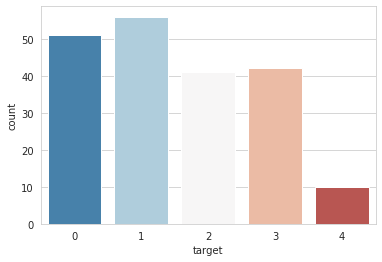

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')

In [29]:
#Separating Feature and Target matrices
X = data.drop(['target'], axis=1)
y=data['target']

In [30]:
#Feature scaling is a method used to standardize the range of independent variables or features of data.
#Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [31]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [32]:
#Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

In [33]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

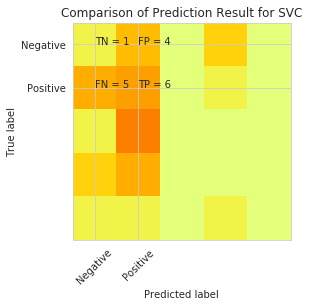

Accuracy of the Model SVC 17.5%


In [34]:
from sklearn.svm import SVC,NuSVC  #Import packages related to Model
Model = "SVC"
model=SVC() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

In [35]:
from sklearn.ensemble import RandomForestClassifier


In [36]:
from sklearn.model_selection import cross_val_score
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [37]:
score.mean()

0.35000000000000003

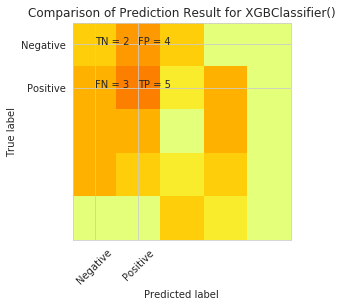

Accuracy of the Model XGBClassifier() 22.5%


In [38]:
from xgboost import XGBClassifier  #Import packages related to Model
Model = "XGBClassifier()"
model=XGBClassifier() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)


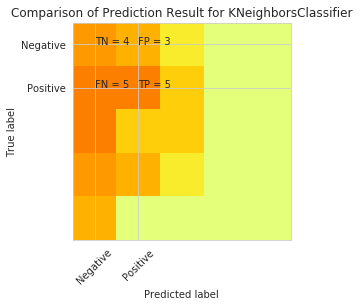

Accuracy of the Model KNeighborsClassifier 27.5%


In [39]:
from sklearn.neighbors import KNeighborsClassifier  #Import packages related to Model
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)


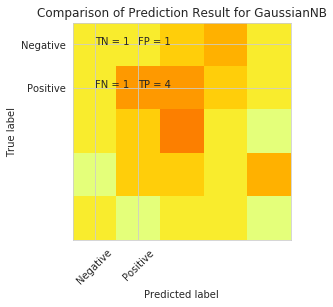

Accuracy of the Model GaussianNB 27.5%


In [40]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB  #Import packages related to Model
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

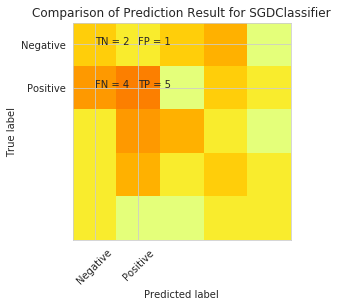

Accuracy of the Model SGDClassifier 32.5%


In [41]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "SGDClassifier"
model=SGDClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)


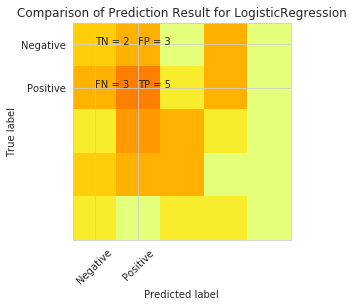

Accuracy of the Model LogisticRegression 25.0%


In [42]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

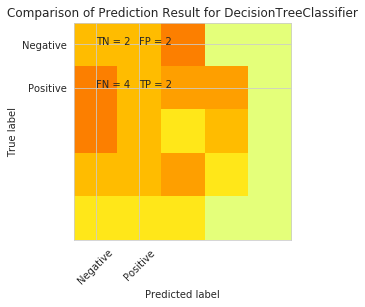

Accuracy of the Model DecisionTreeClassifier 15.0%


In [43]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

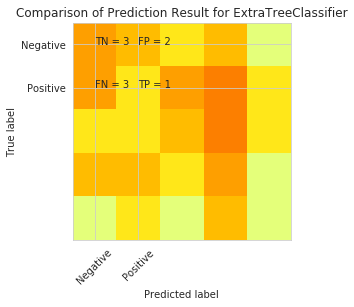

Accuracy of the Model ExtraTreeClassifier 22.5%


In [44]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "ExtraTreeClassifier"
model=ExtraTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

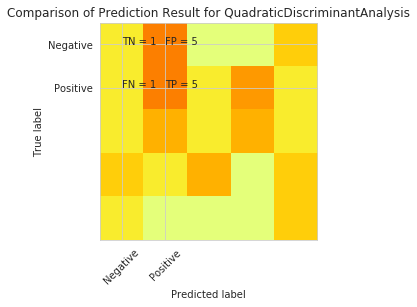

Accuracy of the Model QuadraticDiscriminantAnalysis 22.5%


In [45]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
Model = "QuadraticDiscriminantAnalysis"
model = QuadraticDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

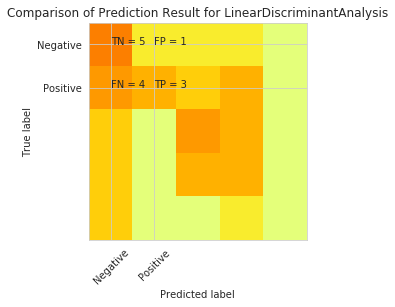

Accuracy of the Model LinearDiscriminantAnalysis 37.5%


In [46]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
Model = "LinearDiscriminantAnalysis"
model=LinearDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

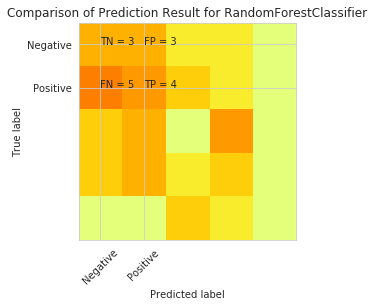

Accuracy of the Model RandomForestClassifier 22.5%


In [47]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

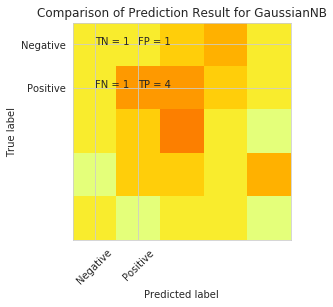

Accuracy of the Model GaussianNB 27.5%


In [48]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB  #Import packages related to Model
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

In [49]:
y_pred = model.predict(X_test)
y_pred

array([4, 3, 4, 1, 1, 4, 1, 3, 4, 2, 1, 0, 2, 2, 1, 3, 0, 3, 2, 4, 1, 2,
       3, 2, 2, 2, 3, 1, 0, 1, 2, 0, 1, 2, 3, 2, 3, 2, 2, 2])

# savemodel

In [50]:
#save model
from joblib import dump,load

In [51]:
dump(Model,'SGDClassifier.joblib')

['SGDClassifier.joblib']

# now we encode target variable with ones=presence and zeroes=absence of heart disease

In [89]:
data.head()

,age,sex,cp,restecg,target,trestbps_0,trestbps_100,trestbps_102,trestbps_104,trestbps_106,...,slope_2,slope_3,slope_?,ca_0,ca_?,thal_3,thal_6,thal_7,thal_?,thal_?.1
0,63,1,4,1.1,2,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,44,1,4,1.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,60,1,4,1.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,55,1,4,1.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,66,1,3,2.0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [96]:
data['target'] = data['target'].replace([1,2,3,4,],1)

In [97]:
data.target.unique()

array([1, 0])

In [98]:

data.head()

,age,sex,cp,restecg,target,trestbps_0,trestbps_100,trestbps_102,trestbps_104,trestbps_106,...,slope_2,slope_3,slope_?,ca_0,ca_?,thal_3,thal_6,thal_7,thal_?,thal_?.1
0,63,1,4,1.1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,44,1,4,1.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,60,1,4,1.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,55,1,4,1.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,66,1,3,2.0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [99]:
data.target.unique()

array([1, 0])

In [100]:
#now we converted target into ones=presence and zeroes=absence of heart disease

In [101]:
#Separating Feature and Target matrices
X = data.drop(['target'], axis=1)
y=data['target']

In [102]:
#Feature scaling is a method used to standardize the range of independent variables or features of data.
#Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [103]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [104]:
#Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

In [105]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

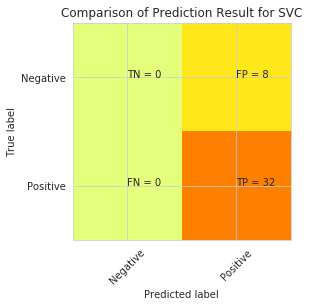

Accuracy of the Model SVC 80.0%


In [106]:
from sklearn.svm import SVC,NuSVC  #Import packages related to Model
Model = "SVC"
model=SVC() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

In [107]:
from sklearn.model_selection import cross_val_score
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [108]:
score.mean()

0.7649999999999999

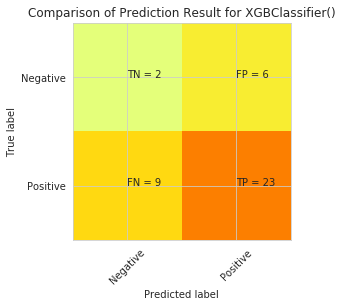

Accuracy of the Model XGBClassifier() 62.5%


In [109]:
from xgboost import XGBClassifier  #Import packages related to Model
Model = "XGBClassifier()"
model=XGBClassifier() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

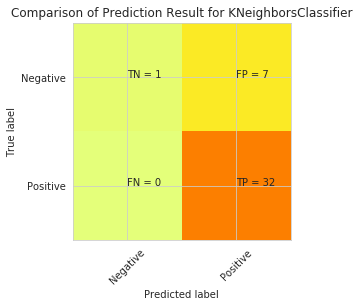

Accuracy of the Model KNeighborsClassifier 82.5%


In [110]:
from sklearn.neighbors import KNeighborsClassifier  #Import packages related to Model
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

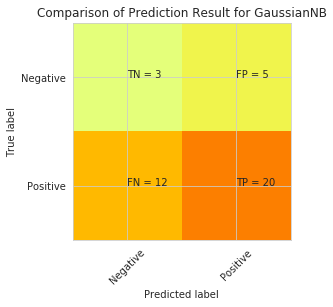

Accuracy of the Model GaussianNB 57.5%


In [111]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB  #Import packages related to Model
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

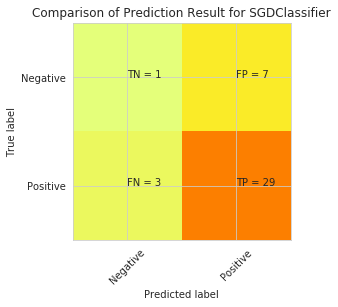

Accuracy of the Model SGDClassifier 75.0%


In [112]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "SGDClassifier"
model=SGDClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

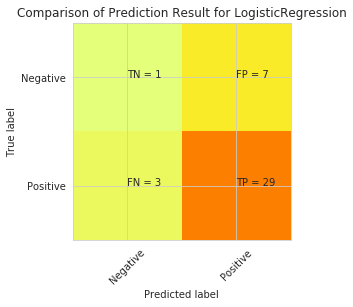

Accuracy of the Model LogisticRegression 75.0%


In [113]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

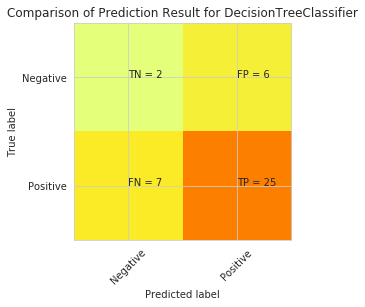

Accuracy of the Model DecisionTreeClassifier 67.5%


In [114]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

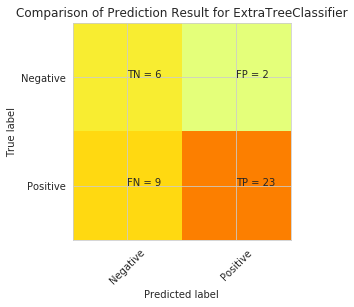

Accuracy of the Model ExtraTreeClassifier 72.5%


In [115]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "ExtraTreeClassifier"
model=ExtraTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

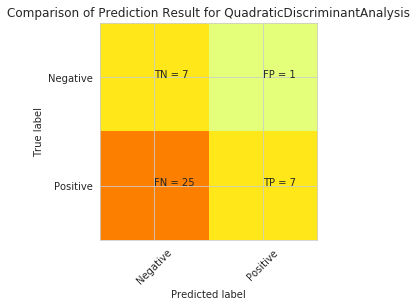

Accuracy of the Model QuadraticDiscriminantAnalysis 35.0%


In [116]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
Model = "QuadraticDiscriminantAnalysis"
model = QuadraticDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

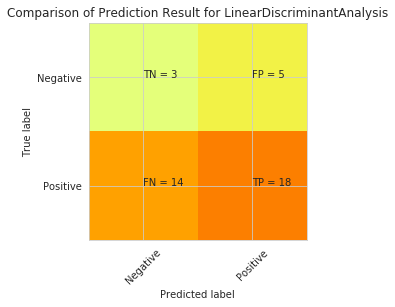

Accuracy of the Model LinearDiscriminantAnalysis 52.5%


In [117]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
Model = "LinearDiscriminantAnalysis"
model=LinearDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

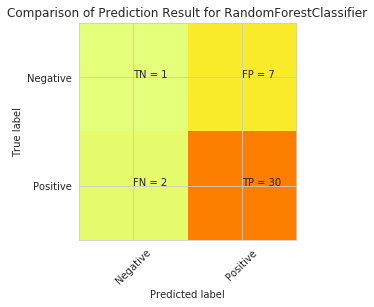

Accuracy of the Model RandomForestClassifier 77.5%


In [118]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

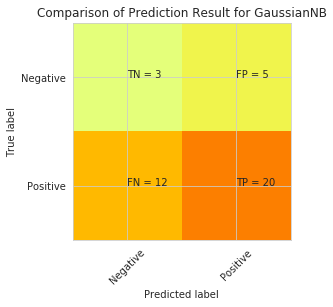

Accuracy of the Model GaussianNB 57.5%


In [119]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB  #Import packages related to Model
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

# svc gives you 80 % accuracy,therefore finalise model svc

In [120]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

# save model

In [121]:
#save model
from joblib import dump,load

In [122]:
dump(Model,'SVC.joblib')

['SVC.joblib']